<a href="https://colab.research.google.com/github/samrudh18/Reinforcement-Learning/blob/main/CS698R-Assignment-3-Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 3
# Submission Deadline: 17/11/21, 9 PM
# Submission Link: https://forms.gle/fq7g53adYcZW7UMz8 

Name: **SAMRUDH B GOVINDARAJ**

Roll No.: **20128409**

IITK Email: **samrudh20@iitk.ac.in**

**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), and an image folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via the Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
- **DO NOT Forget to write name, roll no and email details above**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

In [ ]:
# all imports go in here
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## OpenAI Gym Environments

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particualr we will be exploring "CartPole-v0" and "MountainCar-v0" environments (https://gym.openai.com/docs/). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments. 

In [ ]:
# Create CartPole environment
#https://github.com/openai/gym/wiki/CartPole-v0

env = gym.make('CartPole-v0')
env.seed(34)
s = env.reset()
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(20):
    print("In episode {}".format(episode))
    for i in range(100):
       # env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
            s=env.reset()
            done=False
env.close()

Observation Space = 
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Action Space = 
Discrete(2)
In episode 0
[ 0.03803934  0.00688179 -0.04879908 -0.01354838]
[ 0.03817697 -0.18750758 -0.04907004  0.26334734]
[ 0.03442682 -0.38189603 -0.0438031   0.54015822]
[ 0.0267889  -0.57637576 -0.03299993  0.81872401]
[ 0.01526139 -0.77103086 -0.01662545  1.10084747]
[-1.59232114e-04 -5.75694123e-01  5.39149728e-03  8.02995200e-01]
[-0.01167311 -0.77088959  0.0214514   1.09736923]
[-0.02709091 -0.96628731  0.04339879  1.39670461]
[-0.04641665 -0.77173121  0.07133288  1.11790048]
[-0.06185128 -0.57761406  0.09369089  0.84841934]
[-0.07340356 -0.38388629  0.11065927  0.586607  ]
[-0.08108128 -0.19047395  0.12239141  0.33073046]
[-0.08489076  0.00271254  0.12900602  0.07901172]
[-0.08483651 -0.19400008  0.13058626  0.40945137]
[-0.08871651 -0.00094793  0.13877529  0.16062202]
[-0.08873547 -0.19775563  0.14198773  0.49366455]
[-0.09269058 -0.00489168  0.15186102  0.24888418]
[-0.

In [ ]:
# Create MountainCar environment: 
# https://github.com/openai/gym/wiki/MountainCar-v0 

env = gym.make('MountainCar-v0')
env.seed(45)
s = env.reset()
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(20):
    print("In episode {}".format(episode))
    for i in range(100):
        #env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
            s=env.reset()
            done=False
env.close()

Observation Space = 
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action Space = 
Discrete(3)
In episode 0
[-0.58658311  0.        ]
[-5.87113531e-01 -5.30423424e-04]
[-0.58617047  0.00094306]
[-0.58376087  0.0024096 ]
[-0.58190251  0.00185837]
[-0.58060909  0.00129342]
[-0.57789018  0.00271891]
[-0.57376587  0.0041243 ]
[-0.57026674  0.00349914]
[-0.56741874  0.002848  ]
[-0.56524303  0.00217571]
[-0.5627558   0.00248723]
[-0.56097557  0.00178023]
[-0.5589156   0.00205997]
[-0.55759125  0.00132435]
[-0.5550124   0.00257885]
[-0.55119829  0.00381411]
[-0.54717743  0.00402087]
[-0.54397987  0.00319756]
[-0.54162955  0.00235032]
[-0.53914406  0.00248549]
[-0.53554203  0.00360203]
[-0.53085044  0.00469159]
[-0.52710447  0.00374597]
[-0.52433221  0.00277226]
[-0.52055444  0.00377776]
[-0.51579951  0.00475493]
[-0.51110307  0.00469644]
[-0.50650032  0.00460275]
[-0.50102575  0.00547457]
[-0.49472036  0.0063054 ]
[-0.48963128  0.00508908]
[-0.48479651  0.00483476]
[-0.47925211

## Deep Value Based RL agents.

### The purpose of this assignment is to learn about different Deep Value Based RL agents.

In this assignment you will be implementing Deep RL algorithms we learnt in Lectures 12, 13, 14 and 15. Namely, we will be implementing NFQ, DQN, Double DQN (DDQN), Duelling Double DQN (D3QN), and Duelling Double DQN with Prioritized Experience Replay (D3QN-PER). For all the algorithms below, this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with the best values. This way you will learn to tune the model. Some of the values were specified in the lecture, that would be a good starting point. Your aim is to develop the best NFQ/DQN/DDQN/D3QN/D3QN-PER agent for each of the setting.  

For those of you who follow TEDEd, here is an interesting video by TED on DQN and Atari Games: https://www.youtube.com/watch?v=PP8Zc778B8s 

Also since these environments are available in OpenAI Gym, there are public leaderboards (https://github.com/openai/gym/wiki/Leaderboard) for each of these environments. Compare where does your agent stand on these leaderboard for each of these environments, try to tune your agents so that it is on the top of the leaderboard. In fact, if your agent performs well on these environments, you can alse make your entry on the leaderboard.  

### All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly. 

In [ ]:
# mention the values of all the hyperparameters to be used in the entire notebook, put the values that gave the best
# performance and were finally used for the agent

gamma =
epsilon = #epsolon greedy strategy
temp = #softmax strategy 
delta = #huber loss
tau = #D3QN
alpha = #D3QN-PER
beta = #D3QN-PER
beta_rate = #D3QN-PER
MAX_TRAIN_EPISODES = 
MAX_EVAL_EPISODES = 

SyntaxError: ignored

## Helper Functions

In [ ]:
def selectGreedyAction(net, state):
    #this function gets q-values via the network and selects greedy action from q-values and returns it
    
    #Your code goes in here
   # Q=net(F.one_hot(torch.tensor(state),num_classes=env.observation_space.shape[0]).float()) 
    with torch.no_grad():
      Q=net(torch.tensor(state).float())
      greedyAction=torch.argmax(Q).item()
    return greedyAction

In [ ]:
def selectEpsilonGreedyAction(net,  state, eps=0.05,EPS_END=0.05,EPS_START=1, EPS_DECAY=2000,decay=False, steps=None):
    #this function gets q-values via the network and selects an action from q-values using epsilon greedy strategy
    #and returns it
    #note this function can be used for decaying epsilon greedy strategy, 
    #you would need to create a wrapper function that will handle decaying epsilon
    #you can create this wrapper in this helper function section
    #for the agents you would be implementing it would be nice to play with decaying parameter to get optimal results
    
    #Your code goes in here
    if decay:
      epsilon = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * steps / EPS_DECAY)
    else:
      epsilon=eps
    with torch.no_grad():
      Q=net(torch.tensor(state).float())
      if np.random.uniform()>epsilon:
          eGreedyAction=torch.argmax(Q).item()
      else:
          n=env.action_space.n
          eGreedyAction = np.random.choice(np.arange(n)) 

    return eGreedyAction

In [ ]:
def selectSoftMaxAction(net, state, temp):
    #this function gets q-values via the network and selects an action from q-values using softmax strategy
    #and returns it
    #note this function can be used for decaying temperature softmax strategy, 
    #you would need to create a wrapper function that will handle decaying temperature
    #you can create this wrapper in this helper function section
    #for the agents you would be implementing it would be nice to play with decaying parameter to get optimal results
    
    #Your code goes in here
    with torch.no_grad():
      Q=net(torch.tensor(state).float())
      softmax=(torch.exp(Q)/temp)/torch.sum((torch.exp(Q)/temp))
      softAction=np.random.choice(len(softmax),p=softmax.detach().numpy())
    return softAction

In [ ]:
#Value Network
def createValueNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value for each possible action
    
    #Your code goes in here
    class createQNetwork(nn.Module):

      def __init__(self, S , A, hidDim , activationFunction):
            super().__init__()
            self.activationFunction=activationFunction
            # hidden layer 1
            self.linear1 = nn.Linear(S,hidDim[0])
            # hidden layer 2
            self.linear2 = nn.Linear(hidDim[0],hidDim[1])
            # output layer
            self.linear3 = nn.Linear(hidDim[1], A)
            
      def forward(self, state):
            # Get intermediate outputs using hidden layer
            out = self.linear1(state)
            # Apply activation function
            out = self.activationFunction(out)
            # Get intermediate outputs using hidden layer
            out = self.linear2(out)
            # Apply activation function
            out = self.activationFunction(out)
            # Get predictions using output layer
            out = self.linear3(out)
            return out

    valueNetwork = createQNetwork (inDim,outDim,hDim,activation)     
    return valueNetwork

    #valueNetwork = createValueNetwork (env.observation_space.n,env.action_space.n,[512,128],F.relu ) 

In [ ]:
#Dueling Network
def createDuelingNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value which is derived 
    #internally from action-advantage function and v-function, 
    #Note we center the advantage values, basically we subtract the mean from each state-action value
    
    #Your code goes in here
    class createDuelQNetwork(nn.Module):

      def __init__(self, S , A, hidDim , activationFunction):
            super().__init__()
            self.activationFunction=activationFunction
            #Value network
            # hidden layer 1
            self.linear1 = nn.Linear(S,hidDim[0])
            # hidden layer 2
            self.linear2 = nn.Linear(hidDim[0],hidDim[1])
            # output layer
            self.linear3 = nn.Linear(hidDim[1], 1)
            #Action network
            # hidden layer 1
            self.linear4 = nn.Linear(S,hidDim[0])
            # hidden layer 2
            self.linear5 = nn.Linear(hidDim[0],hidDim[1])
            # output layer
            self.linear6 = nn.Linear(hidDim[1], A)

            
      def forward(self, state):
            # Get intermediate outputs using hidden layer
            Vout = self.linear1(state)
            # Apply activation function
            Vout = self.activationFunction(Vout)
            # Get intermediate outputs using hidden layer
            Vout = self.linear2(Vout)
            # Apply activation function
            Vout = self.activationFunction(Vout)
            # Get predictions using output layer
            Vout = self.linear3(Vout)

            # Get intermediate outputs using hidden layer
            Aout = self.linear4(state)
            # Apply activation function
            Aout = self.activationFunction(Aout)
            # Get intermediate outputs using hidden layer
            Aout = self.linear5(Aout)
            # Apply activation function
            Aout = self.activationFunction(Aout)
            # Get predictions using output layer
            Aout = self.linear6(Aout)

            Qout=Vout+(Aout-torch.mean(Aout))
            return Qout

    QNetwork = createDuelQNetwork (inDim,outDim,hDim,activation)     
    return QNetwork

In [ ]:
#Dueling Network
def createDuelingNetwork(inDim, outDim, hDim = [512,128], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value which is derived 
    #internally from action-advantage function and v-function, 
    #Note we center the advantage values, basically we subtract the mean from each state-action value
    
    #Your code goes in here
    class createDuelQNetwork(nn.Module):

      def __init__(self, S , A, hidDim , activationFunction):
            super().__init__()
            self.activationFunction=activationFunction
            #Value network
            # hidden layer 1
            self.linear1 = nn.Linear(S,hidDim[0])
            # hidden layer 2
            self.linear2 = nn.Linear(hidDim[0],hidDim[1])
            # output layer
            self.linear3 = nn.Linear(hidDim[1], 1+A)

            
      def forward(self, state):
            # Get intermediate outputs using hidden layer
            out = self.linear1(state)
            # Apply activation function
            out = self.activationFunction(out)
            # Get intermediate outputs using hidden layer
            out = self.linear2(out)
            # Apply activation function
            out = self.activationFunction(out)
            # Get predictions using output layer
            out = self.linear3(out)

            if len(out.shape)==1:
               Vout=out[0]
               Aout=out[1:]
            else:
              Vout=out[:,0]
              Aout=out[:,1:]
              Vout=Vout.unsqueeze(1)
            Vout=Vout.repeat(1,env.action_space.n)
            #  print(Vout.reshape(1,Vout.shape))#Aout-torch.mean(Aout))
            Qout=Vout+(Aout-torch.mean(Aout))

            return Qout

    QNetwork = createDuelQNetwork (inDim,outDim,hDim,activation)     
    return QNetwork

In [ ]:
def plotQuantity(quantityListDict, totalEpisodeCount, descriptionList):
    #this function takes in the quantityListDict and plots quantity vs episodes.
    #quantityListDict = {envInstanceCount: quantityList}
    #quantityList is list of the qunatity per episode, 
    #for example it could be mean reward per episode, traintime per episode, etc.
    #
    #NOTE: len(quantityList) == totalEpisodeCount
    #
    #Since we run multiple instances of the environment, there will be variance across environments
    #so in the plot, you will plot per episode maximum, minimum and average value across all env instances
    #Basically, you need to envelop (e.g., via color) the quantity between max and min with mean value in between
    #
    #use the descriptionList parameter to put legends, title, etc. 
    #For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot lines/envelop.
    #
    #this is a generic function and can be used to plot any of the quantity of interest
    #In particular we will be using this function to plot:
    #        mean train rewards vs episodes
    #        mean evaluation rewards vs episodes
    #        total steps vs episode
    #        train time vs episode
    #        wall clock time vs episode
    #
    #
    #this function doesn't return anything
    
    #Your code goes in here

    fig,axs=plt.subplots(2,3,figsize=(30,20))
    fig.delaxes(axs[1][2])

    ylabels=descriptionList['ylabels']
    agents=descriptionList['agents']
    colors=descriptionList['colors']
    subplots=[axs[0][0],axs[0][1],axs[0][2],axs[1][0],axs[1][1]]
 
    for k in range(quantityListDict.shape[1]):
          for j in range(quantityListDict.shape[0]):
              axis=subplots[k]

              ma_min,ma_list,ma_max=moving_average(np.mean(quantityListDict[j][k],axis=0),n=10)
              axis.plot(ma_min, color=colors[j][0])  
              axis.plot(ma_list, color=colors[j][0])
              axis.plot(ma_max,color=colors[j][0])
              axis.fill_between(np.arange(len(ma_min)), ma_min, ma_max, color=colors[j][1],label=agents[j])

          axis.set_xlabel('Episodes')
          axis.set_ylabel(ylabels[k])
          axis.set_title(f'{ylabels[k]} for all agents')
          axis.legend()
          

    return              

In [ ]:
def huberLoss(error, delta):
    #this function calculates the huber loss for the error using the delta parameter
    
    #Your code goes in here
    if abs(error)<=delta: #small values of error
      hLoss=0.5*(error**2) #Loss is quadratic
    else:                 #large values of error
      hLoss= delta*(abs(error)-0.5*delta)
    return hLoss

In [ ]:
#in case you want to create any other helper function, the code goes in here

In [ ]:
#in case you want to create any other helper function, the code goes in here

## <font color='green'> Do not change any Class/Methods definition. We have split the class methods across cells for code readibility purposes. This requires to inherit the same class, please do not change it. </font>

## ReplayBuffer 

In next few cells, you will implement replaybuffer class. 

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
following are the methods for this class which are implemented in subsequent cells

`class ReplayBuffer():
    def __init__(self, bufferSize, **kwargs)
    def store(self, experience)
    def update(self, indices, priorities) 
    def collectExperiences(env, state, explorationStrategy, net = None)
    def sample(self, batchSize, **kwargs)
    def splitExperiences(self, experiences)
    def length(self)
 `   

In [ ]:
class ReplayBuffer():
    def __init__(self, bufferSize, minlen=0,bufferType = 'DQN', alpha=1,beta=0.1,beta_rate=0.99992,**kwargs):
        # this function creates the relevant data-structures, and intializes all relevant variables
        # it can take variable number of parameters like alpha, beta, beta_rate (required for PER)
        # here the bufferType variable can be used to maintain one class for all types of agents
        # using the bufferType parameter in the methods below, you can implement all possible functionalities 
        # that could be used for different types of agents
        # permissible values for bufferType = NFQ, DQN, DDQN, D3QN and PER-D3QN
        
        #Your code goes in here
          self.maxlen=bufferSize
          self.minlen=minlen
          self.bufferType=bufferType
          self.buffer=[]

          if self.bufferType=='PER-D3QN':
            self.priorities=[]     
            self.alpha=alpha
            self.beta=beta
            self.beta_rate=beta_rate
          return 

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def store(self, experience):
        #stores the experiences, based on parameters in init it can assign priorities, etc.  
        #
        #this function does not return anything
        #
        #Your code goes in here
        if len(self.buffer)>=self.maxlen: 
          self.buffer.pop(0)
          if self.bufferType=='PER-D3QN':
            self.priorities.pop(0)
        self.buffer.append(experience)

        if self.bufferType=='PER-D3QN':
           if len(self.priorities)>0:
                self.priorities.append(max(self.priorities))
           else:
                self.priorities.append(1)   

        return 

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def update(self, indices, priorities):
        #this is mainly used for PER-DDQN
        #otherwise just have a pass in this method
        #
        #this function does not return anything
        #
        #Your code goes in here
        if self.bufferType=='PER-D3QN':
            for i in range(len(indices)):
              self.priorities[indices[i]]=priorities[i]
        else:
          return 

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def collectExperiences(self,env, state, explorationStrategy, countExperiences, net = None,eps=0.05,EPS_START=1,EPS_END=0.01,EPS_DECAY=5000,decay=True,steps=None):
        #this method allows the agent to interact with the environment starting from a state and it collects
        #experiences during the interaction, it uses network to get the value function and uses exploration strategy
        #to select action. It collects countExperiences and in case the environment terminates before that it returns
        #the function. calling this method needs to handle early termination accordingly.
        #
        #this function does not return anything
        #
        #Your code goes in here
        
        s=state
        i=0
        train_r=0
      #  s=env.reset()
        while i<countExperiences or len(self.buffer)<self.minlen:
          if explorationStrategy=='greedy':
            a=selectGreedyAction(net,s)
          elif explorationStrategy=='epsilon':
            a=selectEpsilonGreedyAction(net,s,eps=eps,EPS_START=EPS_START,EPS_END=EPS_END,EPS_DECAY=EPS_DECAY,decay=decay, steps=steps)
          elif explorationStrategy=='softmax':
            a=selectSoftMaxAction(net, s, temp)
          elif explorationStrategy=='random':
             a=np.random.randint(env.action_space.n)
          s_,r,done,info=env.step(a)
          experience=[s,a,r,s_,done]
          self.store(experience)
          s=s_
          train_r+=r
          i+=1
          if done:
            s=env.reset()
            if len(self.buffer)>self.minlen:
              return i, train_r
          

        if len(self.buffer)<self.minlen:
              print(f'Buffer length={len(self.buffer)}, Min length={self.minlen}, countExperiences={countExperiences}')
        return i,train_r

In [ ]:
import random
class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize, strategy='random',**kwargs):
        # this method returns batchSize number of experiences
        # based on extra arguments, it could do sampling or it could return the latest batchSize experiences or
        # via some other strategy
        #
        # in the case of Prioritized Experience Replay (PER) the sampling needs to take into account the priorities
        #
        # this function returns experiences samples
        #
        #Your code goes in here

        if self.bufferType=='PER-D3QN':
            p=(np.array(self.priorities)**self.alpha)/sum(np.array(self.priorities)**self.alpha)
            idx = np.random.choice(list(range(len(p))),size=batchSize, p=p)
            weights= (len(self.buffer)*p[idx])**-self.beta
            weights/=np.max(weights)
            experiencesList=np.array(self.buffer)[idx]
            self.beta*=self.beta_rate
            return experiencesList,idx,weights
        else:  
          if strategy=='random':
            experiencesList=random.sample(self.buffer,batchSize)
          elif strategy=='recent':
            experiencesList=self.buffer[:batchSize]
          
        return experiencesList

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences):
        #it takes in experiences and gives the following:
        #states, actions, rewards, nextStates, dones
        #
        #Your code goes in here
        #
        states, actions, rewards, nextStates, dones=([] for i in range(5))
        for item in experiences:
            states.append(item[0])
            actions.append(item[1])
            rewards.append(item[2])
            nextStates.append(item[3])
            dones.append(item[4])    
       # states, actions, rewards, nextStates, dones = buffer_arr[:,0],buffer_arr[:,1],buffer_arr[:,2],buffer_arr[:,3],buffer_arr[:,4]
        return np.array(states), np.array(actions), np.array(rewards).astype('float32'), np.array(nextStates), np.array(dones).astype('int32')

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def length(self):
        #tells the number of experiences stored in the internal buffer
        #
        #Your code goes in here
        #
        bufferSize=len(self.buffer)
        return bufferSize

## Neural Fitted Q (NFQ)

Implement the Neural Fitted Q algorithm. We have studied about NFQ algorithm in Lecture 12. Use the function definitions (given below).

This class implements the NFQ Agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment. 
Also please feel free to play with different exploration strategies with decaying paramters (epsilon/temperature)

`class NFQ():
    def __init__(env, seed, gamma, epochs,
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runNFQ(self)
    def trainAgent(self)
    def trainNetwork(self, experiences, epochs)
    def evaluateAgent(self)`

In [ ]:
class NFQ():
    def __init__(self, env, seed, gamma=0.99, bufferSize=50000,batchSize=100,minlen=200,optimizerFn=optim.RMSprop,optimizerLR=0.0005,hDim=[512,128],\
      activationFunction=F.relu, MAX_TRAIN_EPISODES=1000, MAX_EVAL_EPISODES=1,explorationStrategyTrainFn='epsilon', explorationStrategyEvalFn='greedy',\
      epochs=1, print_results=True):  

        #this NFQ method 
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc. 
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates Q-network using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStartegy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences 
        # 7. Creates the replayBuffer
    
    #Your code goes in here

          # 1) Init
      self.env = env
      self.env.seed(seed)
      self.state=env.reset()
      self.epochs=epochs
      self.gamma=gamma

      # 2) Bookeeping
      self.initBookKeeping()
      self.print=print_results

      # 3) Q-network
      self.net = createValueNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )

      #4) Optimizer
      self.optimizer = optimizerFn(self.net.parameters(),lr = optimizerLR)

      #5) explorationStartegy variables/functions
      self.explorationStrategyTrain=explorationStrategyTrainFn
      self.explorationStrategyEval=explorationStrategyEvalFn
      self.MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES
      self.MAX_EVAL_EPISODES=MAX_EVAL_EPISODES
      self.steps=0

      #6) Batch size
      self.batchSize=batchSize

      #7)replayBuffer
      self.buffer=ReplayBuffer(bufferSize=bufferSize, minlen=minlen,bufferType = 'NFQ')

In [ ]:
class NFQ(NFQ):
    def initBookKeeping(self):
        #this method creates and intializes all the variables required for book-keeping values and it is called
        #init method
        #Your code goes in here

        self.trainRewardsList=[]
        self.trainTimeList=[]
        self.evalRewardsList=[]
        self.finalEvalRewardsList=[]
        self.wallClockTimeList=[]   
        self.trainStepsList=[]
        self.quantityListDict = {}  #quantityListDict = {envInstanceCount: quantityList}
    

In [ ]:
class NFQ(NFQ):
    def performBookKeeping(self, train = True, time=None, final=False):
        #this method updates relevant variables for the bookKeeping, this can be called 
        #multiple times during training
        #if you want you can print information using this, so it may help to monitor progress and also help to debug
        
    #Your code goes in here

        if train==True:
         #  self.trainRewardsList.append(np.mean(self.trainStepsList[-self.epochs:]))
           self.trainTimeList.append(time)
        else:
            self.finalEvalRewardsList.append(np.mean(self.evalRewardsList[-self.MAX_EVAL_EPISODES:]))
            self.wallClockTimeList.append(time)

        if final:
          self.quantityListDict['trainRewards']=self.trainRewardsList
          self.quantityListDict['trainTime']=self.trainTimeList[1:]
          self.quantityListDict['evalRewards']=self.evalRewardsList
          self.quantityListDict['wallClockTime']=self.wallClockTimeList
          self.quantityListDict['trainSteps']=self.trainStepsList
        return

In [ ]:
import time
class NFQ(NFQ):
    def runNFQ(self,countExperiences, EPS_START=1,eps=0.5,EPS_END=0.3,EPS_DECAY=5000,decay=False):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards 
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode 
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training, 
        #                               note this will include time for BookKeeping and evaluation 
        # Note both trainTime and wallClockTime get accumulated as episodes proceed. 
        
        
        #Your code goes in here
        for e in range(self.MAX_TRAIN_EPISODES):

            train_tik=time.time()
            self.trainAgent(countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay)
            train_tok=time.time()
            self.performBookKeeping (time=train_tok-train_tik,train=True)
            test_tik=time.time()
            self.evaluateAgent()
            test_tok=time.time()
            self.performBookKeeping (time=(train_tok-train_tik)+(test_tok-test_tik), train=False)  

            if self.print:
              if e%100==0:
                mean_rewards, sd_rewards= np.mean(self.evalRewardsList[-100:]) , np.std (self.evalRewardsList[-100:])  
                print(f'mean_rewards={mean_rewards} sd_rewards={sd_rewards}, epsiodes={e}') 

        finalEvalReward = self.evalRewardsList[-1]
        wallClockTimeList=None
        self.performBookKeeping(final=True)
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward 

In [ ]:
class NFQ(NFQ):
    def trainAgent(self,countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay):
        #this method collects experiences and trains the NFQ agent and does BookKeeping while training. 
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        
        #Your code goes in here
        
        state=self.env.reset()
        new_steps, train_r=self.buffer.collectExperiences(env=self.env, state=state, explorationStrategy=self.explorationStrategyTrain, countExperiences=countExperiences, net=self.net,\
                                       eps=eps,EPS_START=EPS_START,EPS_END=EPS_END,EPS_DECAY=EPS_DECAY,steps=self.steps,decay=decay)
        self.steps+=new_steps
        self.trainStepsList.append(self.steps)
        self.trainRewardsList.append(train_r)
        experiences = self.buffer.sample ( self.batchSize )   #only one batch
        self.trainNetwork(experiences, self.epochs)

        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [ ]:
class NFQ(NFQ):
    def trainNetwork(self, experiences, epochs):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss 
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc. 
        
        #Your code goes in here
        
        for _ in range(self.epochs):
                states, actions, rewards, nextStates, dones= self.buffer.splitExperiences(experiences) 
                with torch.no_grad():
                    q_nextStates=self.net(torch.tensor(nextStates).float()).detach()
                    q_nextStatesActions=torch.max( q_nextStates, dim=1)[0]
                td_targets=torch.tensor(rewards) + (self.gamma * q_nextStatesActions * (1-dones).astype('float32')) #add extra value to td targets only when not done (1-dones)

                q_states=self.net(torch.tensor(states).float())
                actions_idx=F.one_hot(torch.tensor(actions), num_classes=env.action_space.n)
                q_statesActions=torch.sum(q_states*actions_idx,axis=1)
                loss=F.mse_loss(td_targets,q_statesActions)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

              #  self.trainRewardsList.append(np.sum(rewards))
        
        return

In [ ]:
class NFQ(NFQ):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        
        #Your code goes in here
        for e2 in range (self.MAX_EVAL_EPISODES):
            eval_rewards = 0
            s = env.reset()
            done=False
            while(1):
                  if self.explorationStrategyEval=='greedy':
                    a=selectGreedyAction(self.net,s)
                  elif self.explorationStrategyEval=='epsilon':
                    a=selectEpsilonGreedyAction(self.net,s,eps=0.5)
                  elif self.explorationStrategyEval=='softmax':
                    a=selectSoftMaxAction(self.net, s, temp)
                  s_ , r , done, info = env.step (a)
                  eval_rewards+= r
                  s=s_
                  if done:
                      self.evalRewardsList.append(eval_rewards)
                      s=env.reset()
                      break
        
        return #finalEvalRewardsList 
        
        return finalEvalRewardsList  

## Deep Q-Network (DQN) 

Implement the Deep Q algorithm. We have studied about DQN algorithm in Lecture 13. Use the function definitions (given below).

This class implements the DQN Agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class DQN():
    def __init__(env, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runDQN(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`

In [ ]:
class DQN():
    def __init__(self,env, seed, gamma, epochs,
                 bufferSize,
                 batchSize,
                 minlen,
                 hDim,
                 activationFunction,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency, print_results=True):
        #this DQN method 
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc. 
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates traget and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStartegy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences 
        # 7. Creates the replayBuffer
    
      #Your code goes in here

      # 1) Init
      self.env = env
      self.env.seed(seed)
      self.state=env.reset()
      self.epochs=epochs
      self.gamma=gamma

      # 2) Bookeeping
      self.initBookKeeping()
      self.print=print_results

      # 3) Q-network
      self.OnlineNet = createValueNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )
      self.TargetNet = createValueNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )

      #4) Optimizer
      self.optimizer = optimizerFn(self.OnlineNet.parameters(),lr = optimizerLR)

      #5) explorationStartegy variables/functions
      self.explorationStrategyTrain=explorationStrategyTrainFn
      self.explorationStrategyEval=explorationStrategyEvalFn
      self.MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES
      self.MAX_EVAL_EPISODES=MAX_EVAL_EPISODES
      self.updateFrequency=updateFrequency
      self.steps=0

      #6) Batch size
      self.batchSize=batchSize

      #7)replayBuffer
      self.buffer=ReplayBuffer(bufferSize=bufferSize, minlen=minlen,bufferType = 'DQN')

    

In [ ]:
class DQN(DQN):
    def initBookKeeping(self):
        #this method creates and intializes all the variables required for book-keeping values and it is called
        #init method
        #
        # Your code goes in here
        #

        self.trainRewardsList=[]
        self.trainTimeList=[]
        self.evalRewardsList=[]
        self.finalEvalRewardsList=[]
        self.wallClockTimeList=[]   
        self.trainStepsList=[]
        self.quantityListDict = {}
        return

In [ ]:
class DQN(DQN):
    def performBookKeeping(self, time=None, train = True, final=False):
        #this method updates relevant variables for the bookKeeping, this can be called 
        #multiple times during training
        #if you want you can print information using this, so it may help to monitor progress and also help to debug
        #
        # Your code goes in here
        #

        if train==True:
           #self.trainRewardsList.append(np.mean(self.trainStepsList[-self.epochs:]))
           self.trainTimeList.append(time)
        else:
            self.wallClockTimeList.append(time)
            self.finalEvalRewardsList.append(np.mean(self.evalRewardsList[-self.MAX_EVAL_EPISODES:]))

        if final:
          self.quantityListDict['trainRewards']=self.trainRewardsList
          self.quantityListDict['trainTime']=self.trainTimeList[1:]
          self.quantityListDict['evalRewards']=self.evalRewardsList
          self.quantityListDict['wallClockTime']=self.wallClockTimeList
          self.quantityListDict['trainSteps']=self.trainStepsList 
        
        return

In [ ]:
import time
class DQN(DQN):
    def runDQN(self, countExperiences, eps=0.5, EPS_START=1,EPS_END=0.3,EPS_DECAY=5000,decay=True):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards 
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode 
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training, 
        #                               note this will include time for BookKeeping and evaluation 
        # Note both trainTime and wallClockTime get accumulated as episodes proceed. 
        #
        #Your code goes in here
        #
        self.updateNetwork()
        for e in range(self.MAX_TRAIN_EPISODES):

            train_tik=time.time()
            self.trainAgent(countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay)
            train_tok=time.time()
            self.performBookKeeping (time=train_tok-train_tik,train=True)
            test_tik=time.time()
            self.evaluateAgent()
            test_tok=time.time()
            self.performBookKeeping (time=(train_tok-train_tik)+(test_tok-test_tik), train=False) 
            if e%self.updateFrequency==0:
                self.updateNetwork()

            if self.print:
              if e%100==0:
                mean_rewards, sd_rewards= np.mean(self.evalRewardsList[-100:]) , np.std (self.evalRewardsList[-100:])  
                print(f'mean_rewards={mean_rewards} sd_rewards={sd_rewards}, epsiodes={e}') 

        finalEvalReward = self.evalRewardsList[-1]
        self.performBookKeeping(final=True)
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward 

In [ ]:
class DQN(DQN):
    def trainAgent(self, countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay):
        #this method collects experiences and trains the agent and does BookKeeping while training. 
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        #Your code goes in here
        #

        state=self.env.reset()
        new_steps, train_r=self.buffer.collectExperiences(env=self.env, state=state, explorationStrategy=self.explorationStrategyTrain, countExperiences=countExperiences, \
                                                        net=self.OnlineNet,eps=eps,EPS_START=EPS_START,EPS_END=EPS_END,EPS_DECAY=EPS_DECAY,steps=self.steps,decay=decay)
        self.steps+=new_steps
        self.trainStepsList.append(self.steps)
        self.trainRewardsList.append(train_r)
        experiences = self.buffer.sample ( self.batchSize )   #only one batch
        self.trainNetwork(experiences, self.epochs)
        
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [ ]:
class DQN(DQN):
    def trainNetwork(self, experiences, epochs):
          # this method trains the value network epoch number of times and is called by the trainAgent function
          # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
          # is further used for calulating the loss. It then uses the optimizer over the loss 
          # to update the params of the network by backpropagating through the network
          # this function does not return anything
          # you can try out other loss functions other than MSE like Huber loss, MAE, etc. 
          #
          #Your code goes in here
          #

          for _ in range(self.epochs):
                states, actions, rewards, nextStates, dones= self.buffer.splitExperiences(experiences) 
                with torch.no_grad():
                    q_nextStates=self.TargetNet(torch.tensor(nextStates).float()).detach()
                    q_nextStatesActions=torch.max( q_nextStates, dim=1)[0]
                td_targets=torch.tensor(rewards) + (self.gamma * q_nextStatesActions * (1-dones).astype('float32')) #add extra value to td targets only when not done (1-dones)

               # self.optimizer.zero_grad()
                q_states=self.OnlineNet(torch.tensor(states).float())
                actions_idx=F.one_hot(torch.tensor(actions), num_classes=env.action_space.n)
                q_statesActions=torch.sum(q_states*actions_idx,axis=1)
                loss=F.mse_loss(td_targets,q_statesActions)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

          return            

In [ ]:
class DQN(DQN):
    def updateNetwork(self):
        #this function updates the onlineNetwork with the target network
        #
        # Your code goes in here
        #
        self.TargetNet.load_state_dict(self.OnlineNet.state_dict())
        return

In [ ]:
class DQN(DQN):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        #
        #Your code goes in here
        #
        for e2 in range (self.MAX_EVAL_EPISODES):
            eval_rewards = 0
            s = env.reset()
            done=False
            while(1):
                  if self.explorationStrategyEval=='greedy':
                    a=selectGreedyAction(self.OnlineNet,s)
                  elif self.explorationStrategyEval=='epsilon':
                    a=selectEpsilonGreedyAction(self.OnlineNet,s,eps=0.5)
                  elif self.explorationStrategyEval=='softmax':
                    a=selectSoftMaxAction(self.OnlineNet, s, temp)
                  s_ , r , done, info = env.step (a)
                  eval_rewards+= r
                  s=s_
                  if done:
                      self.evalRewardsList.append(eval_rewards)
                      s=env.reset()
                      break
        
        return #finalEvalRewardsList  

## Double DQN (DDQN)

Implement the Double DQN agent. We have studied about Double DQN agent in Lecture 14. Use the function definitions (given below).

This class implements the Double DQN agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class DDQN():
    def __init__(env, seed, gamma, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runDDQN(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`

In [ ]:
class DDQN():
    def __init__(self,env, seed, gamma, epochs,
                 bufferSize,
                 batchSize,
                 minlen,
                 hDim,
                 activationFunction,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency, print_results=True):
        #this DDQN method 
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc. 
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates tareget and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStartegy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences 
        # 7. Creates the replayBuffer
        
        #Your code goes in here

        # 1) Init
      self.env = env
      self.env.seed(seed)
      self.state=env.reset()
      self.epochs=epochs
      self.gamma=gamma

      # 2) Bookeeping
      self.initBookKeeping()
      self.print=print_results

      # 3) Q-network
      self.OnlineNet = createValueNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )
      self.TargetNet = createValueNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )

      #4) Optimizer
      self.optimizer = optimizerFn(self.OnlineNet.parameters(),lr = optimizerLR)

      #5) explorationStartegy variables/functions
      self.explorationStrategyTrain=explorationStrategyTrainFn
      self.explorationStrategyEval=explorationStrategyEvalFn
      self.MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES
      self.MAX_EVAL_EPISODES=MAX_EVAL_EPISODES
      self.updateFrequency=updateFrequency
      self.steps=0

      #6) Batch size
      self.batchSize=batchSize

      #7)replayBuffer
      self.buffer=ReplayBuffer(bufferSize=bufferSize, minlen=minlen,bufferType = 'DDQN')

In [ ]:
class DDQN(DDQN):
    def initBookKeeping(self):
        #this method creates and intializes all the variables required for book-keeping values and it is called
        #init method
        #
        # Your code goes in here
        #
        self.trainRewardsList=[]
        self.trainTimeList=[]
        self.evalRewardsList=[]
        self.finalEvalRewardsList=[]
        self.wallClockTimeList=[]   
        self.trainStepsList=[]
        self.quantityListDict = {}
        return

In [ ]:
class DDQN(DDQN):
    def performBookKeeping(self, train = True, time=None, final=False):
        #this method updates relevant variables for the bookKeeping, this can be called 
        #multiple times during training
        #if you want you can print information using this, so it may help to monitor progress and also help to debug
        #
        # Your code goes in here
        #  

        if train==True:
           #self.trainRewardsList.append(np.mean(self.trainStepsList[-self.epochs:]))
           self.trainTimeList.append(time)
        else:
            self.wallClockTimeList.append(time)
            self.finalEvalRewardsList.append(np.mean(self.evalRewardsList[-self.MAX_EVAL_EPISODES:]))

        if final:
          self.quantityListDict['trainRewards']=self.trainRewardsList
          self.quantityListDict['trainTime']=self.trainTimeList[1:]
          self.quantityListDict['evalRewards']=self.evalRewardsList
          self.quantityListDict['wallClockTime']=self.wallClockTimeList
          self.quantityListDict['trainSteps']=self.trainStepsList 
        
        return

In [ ]:
class DDQN(DDQN):
    def runDDQN(self,countExperiences,eps=0.5,EPS_START=1,EPS_END=0.3,EPS_DECAY=500,decay=True):
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards 
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode 
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training, 
        #                               note this will include time for BookKeeping and evaluation 
        # Note both trainTime and wallClockTime get accumulated as episodes proceed. 
        
        #Your code goes in here
        
        self.updateNetwork()
        for e in range(self.MAX_TRAIN_EPISODES):

            train_tik=time.time()
            self.trainAgent(countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay)
            train_tok=time.time()
            self.performBookKeeping (time=train_tok-train_tik,train=True)
            test_tik=time.time()
            self.evaluateAgent()
            test_tok=time.time()
            self.performBookKeeping (time=(train_tok-train_tik)+(test_tok-test_tik), train=False) 
            if e%self.updateFrequency==0:
                self.updateNetwork()

            if self.print:
              if e%100==0:
                mean_rewards, sd_rewards= np.mean(self.evalRewardsList[-100:]) , np.std (self.evalRewardsList[-100:])  
                print(f'mean_rewards={mean_rewards} sd_rewards={sd_rewards}, epsiodes={e}') 

        finalEvalReward = self.evalRewardsList[-1]
        self.performBookKeeping(final=True)
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward 

In [ ]:
class DDQN(DDQN):
    def trainAgent(self,countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay):
        #this method collects experiences and trains the agent and does BookKeeping while training. 
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        #Your code goes in here

        state=self.env.reset()
        new_steps, train_r=self.buffer.collectExperiences(env=self.env, state=state, explorationStrategy=self.explorationStrategyTrain, countExperiences=countExperiences, \
                                                        net=self.OnlineNet,eps=eps,EPS_START=EPS_START,EPS_END=EPS_END,EPS_DECAY=EPS_DECAY,steps=self.steps,decay=decay)
        self.steps+=new_steps
        self.trainStepsList.append(self.steps)
        self.trainRewardsList.append(train_r)
        experiences = self.buffer.sample ( self.batchSize )   #only one batch
        self.trainNetwork(experiences, self.epochs)
        
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [ ]:
class DDQN(DDQN):
    def trainNetwork(self, experiences, epochs):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss 
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc. 
        #
        #Your code goes in here

        for _ in range(self.epochs):
                states, actions, rewards, nextStates, dones= self.buffer.splitExperiences(experiences) 
                with torch.no_grad():    
                    q_onlineNextStates=self.OnlineNet(torch.tensor(nextStates).float()).detach()
                    next_actions_idx=F.one_hot(torch.argmax( q_onlineNextStates, dim=1), num_classes=env.action_space.n)
                    q_nextStates=self.TargetNet(torch.tensor(nextStates).float()).detach()
                    q_nextStatesActions=torch.sum(q_nextStates*next_actions_idx,axis=1)
                td_targets=torch.tensor(rewards) + (self.gamma * q_nextStatesActions * (1-dones).astype('float32')) #add extra value to td targets only when not done (1-dones)

                #self.optimizer.zero_grad()
                q_states=self.OnlineNet(torch.tensor(states).float())
                actions_idx=F.one_hot(torch.tensor(actions), num_classes=env.action_space.n)
                q_statesActions=torch.sum(q_states*actions_idx,axis=1)
                loss=F.mse_loss(td_targets,q_statesActions)
                self.optimizer.zero_grad()
                loss.backward()
                #torch.nn.utils.clip_grad_norm_(self.OnlineNet.parameters(), max_norm=1)
                self.optimizer.step()
        
        return

In [ ]:
class DDQN(DDQN):
    def updateNetwork(self):
        #this function updates the onlineNetwork with the target network
        #
        # Your code goes in here
        #
        self.TargetNet.load_state_dict(self.OnlineNet.state_dict())
        return

In [ ]:
class DDQN(DDQN):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        
        #Your code goes in here
        for e2 in range (self.MAX_EVAL_EPISODES):
            eval_rewards = 0
            s = env.reset()
            done=False
            while(1):
                  if self.explorationStrategyEval=='greedy':
                    a=selectGreedyAction(self.OnlineNet,s)
                  elif self.explorationStrategyEval=='epsilon':
                    a=selectEpsilonGreedyAction(self.OnlineNet,s,eps=0.5)
                  elif self.explorationStrategyEval=='softmax':
                    a=selectSoftMaxAction(self.OnlineNet, s, temp)
                  s_ , r , done, info = env.step (a)
                  eval_rewards+= r
                  s=s_
                  if done:
                      self.evalRewardsList.append(eval_rewards)
                      s=env.reset()
                      break
        return #finalEvalRewardsList  

## Dueling DDQN

Implement the Dueling Double Deep Q algorithm. We have studied about Dueling Double DQN agent in Lecture 14. Use the function definitions (given below).

This class implements the Dueling Double DQN agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class D3QN():
    def __init__(env, seed, gamma, tau, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runD3QN(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`

In [ ]:
class D3QN():
   def __init__(self,env, seed, gamma, epochs,
                 bufferSize,
                 batchSize,
                 minlen,
                 hDim,
                 activationFunction,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency, print_results=True):
        #this DDQN method 
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc. 
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates tareget and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStartegy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences 
        # 7. Creates the replayBuffer
        
        #Your code goes in here

        # 1) Init
      self.env = env
      self.env.seed(seed)
      self.state=env.reset()
      self.epochs=epochs
      self.gamma=gamma

      # 2) Bookeeping
      self.initBookKeeping()
      self.print=print_results

      # 3) Q-network
      self.OnlineNet = createDuelingNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )
      self.TargetNet = createDuelingNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )

      #4) Optimizer
      self.optimizer = optimizerFn(self.OnlineNet.parameters(),lr = optimizerLR)

      #5) explorationStartegy variables/functions
      self.explorationStrategyTrain=explorationStrategyTrainFn
      self.explorationStrategyEval=explorationStrategyEvalFn
      self.MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES
      self.MAX_EVAL_EPISODES=MAX_EVAL_EPISODES
      self.updateFrequency=updateFrequency
      self.steps=0

      #6) Batch size
      self.batchSize=batchSize

      #7)replayBuffer
      self.buffer=ReplayBuffer(bufferSize=bufferSize, minlen=minlen,bufferType = 'D3QN')

In [ ]:
class D3QN(D3QN):
    def initBookKeeping(self):
        #this method creates and intializes all the variables required for book-keeping values and it is called
        #init method
        #
        # Your code goes in here
        #
        self.trainRewardsList=[]
        self.trainTimeList=[]
        self.evalRewardsList=[]
        self.finalEvalRewardsList=[]
        self.wallClockTimeList=[]   
        self.trainStepsList=[]
        self.quantityListDict = {}
        return

In [ ]:
class D3QN(D3QN):
    def performBookKeeping(self, train = True, time=None, final=False):
        #this method updates relevant variables for the bookKeeping, this can be called 
        #multiple times during training
        #if you want you can print information using this, so it may help to monitor progress and also help to debug
        #
        # Your code goes in here
        #
        if train==True:
           #self.trainRewardsList.append(np.mean(self.trainStepsList[-self.epochs:]))
           self.trainTimeList.append(time)
        else:
            self.wallClockTimeList.append(time)
            self.finalEvalRewardsList.append(np.mean(self.evalRewardsList[-self.MAX_EVAL_EPISODES:]))

        if final:
          self.quantityListDict['trainRewards']=self.trainRewardsList
          self.quantityListDict['trainTime']=self.trainTimeList[1:]
          self.quantityListDict['evalRewards']=self.evalRewardsList
          self.quantityListDict['wallClockTime']=self.wallClockTimeList
          self.quantityListDict['trainSteps']=self.trainStepsList 
        
        return

In [ ]:
class D3QN(D3QN):
    def runD3QN(self,countExperiences,eps=0.5,EPS_START=1,EPS_END=0.3,EPS_DECAY=500,decay=True):
   
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards 
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode 
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training, 
        #                               note this will include time for BookKeeping and evaluation 
        # Note both trainTime and wallClockTime get accumulated as episodes proceed. 
        
        #Your code goes in here
        
        self.updateNetwork()
        for e in range(self.MAX_TRAIN_EPISODES):

            train_tik=time.time()
            self.trainAgent(countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay)
            train_tok=time.time()
            self.performBookKeeping (time=train_tok-train_tik,train=True)
            test_tik=time.time()
            self.evaluateAgent()
            test_tok=time.time()
            self.performBookKeeping (time=(train_tok-train_tik)+(test_tok-test_tik), train=False) 
            if e%self.updateFrequency==0:
                self.updateNetwork()

            if self.print:
              if e%100==0:
                mean_rewards, sd_rewards= np.mean(self.evalRewardsList[-100:]) , np.std (self.evalRewardsList[-100:])  
                print(f'mean_rewards={mean_rewards} sd_rewards={sd_rewards}, epsiodes={e}') 

        finalEvalReward = self.evalRewardsList[-1]
        self.performBookKeeping(final=True)
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward  

In [ ]:
class D3QN(D3QN):
    def trainAgent(self,countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay):
        #this method collects experiences and trains the agent and does BookKeeping while training. 
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        #Your code goes in here

        state=self.env.reset()
        new_steps, train_r=self.buffer.collectExperiences(env=self.env, state=state, explorationStrategy=self.explorationStrategyTrain, countExperiences=countExperiences, \
                                                        net=self.OnlineNet,eps=eps,EPS_START=EPS_START,EPS_END=EPS_END,EPS_DECAY=EPS_DECAY,steps=self.steps,decay=decay)
        self.steps+=new_steps
        self.trainStepsList.append(self.steps)
        self.trainRewardsList.append(train_r)
        experiences= self.buffer.sample ( self.batchSize )   #only one batch
        self.trainNetwork(experiences,self.epochs)
        
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [ ]:
class D3QN(D3QN):
   def trainNetwork(self, experiences,epochs):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss 
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc. 
        #
        #Your code goes in here
        
        for _ in range(self.epochs):
                states, actions, rewards, nextStates, dones= self.buffer.splitExperiences(experiences) 
                with torch.no_grad():    
                    q_onlineNextStates=self.OnlineNet(torch.tensor(nextStates).float()).detach()
                    next_actions_idx=F.one_hot(torch.argmax( q_onlineNextStates, dim=1), num_classes=env.action_space.n)
                    q_nextStates=self.TargetNet(torch.tensor(nextStates).float()).detach()
                    q_nextStatesActions=torch.sum(q_nextStates*next_actions_idx,axis=1)
                td_targets=torch.tensor(rewards) + (self.gamma * q_nextStatesActions * (1-dones).astype('float32')) #add extra value to td targets only when not done (1-dones)

                #self.optimizer.zero_grad()
                q_states=self.OnlineNet(torch.tensor(states).float())
                actions_idx=F.one_hot(torch.tensor(actions), num_classes=env.action_space.n)
                q_statesActions=torch.sum(q_states*actions_idx,axis=1)
                loss=F.mse_loss(td_targets,q_statesActions)
                self.optimizer.zero_grad()
                loss.backward()
               # torch.nn.utils.clip_grad_norm_(self.OnlineNet.parameters(), max_norm=1)
                self.optimizer.step()
        
        return

In [ ]:
class D3QN(D3QN):
    def updateNetwork(self):
        #this function updates the onlineNetwork with the target network
        #
        # Your code goes in here
        #
        self.TargetNet.load_state_dict(self.OnlineNet.state_dict())
        return

In [ ]:
class D3QN(D3QN):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        
        #Your code goes in here
        for e2 in range (self.MAX_EVAL_EPISODES):
            eval_rewards = 0
            s = env.reset()
            done=False
            while(1):
                  if self.explorationStrategyEval=='greedy':
                    a=selectGreedyAction(self.OnlineNet,s)
                  elif self.explorationStrategyEval=='epsilon':
                    a=selectEpsilonGreedyAction(self.OnlineNet,s,eps=0.5)
                  elif self.explorationStrategyEval=='softmax':
                    a=selectSoftMaxAction(self.OnlineNet, s, temp)
                  s_ , r , done, info = env.step (a)
                  eval_rewards+= r
                  s=s_
                  if done:
                      self.evalRewardsList.append(eval_rewards)
                      s=env.reset()
                      break
        return #finalEvalRewardsList    

## Dueling Double Deep Q Network with Prioritized Experience Replay (D3QN-PER)

Implement the Dueling Double DQN with Prioritized Experience Replay (D3QN-PER) agent. We have studied about D3QN-PER agent in Lecture 15. Use the function definitions (given below).

This class implements the D3QN-PER agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible OpenAI Gym environment

`class D3QN_PER():
    def __init__(env, seed, gamma, tau, alpha, beta, beta_rate, 
                 bufferSize,
                 batchSize,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency)
    def initBookKeeping(self)
    def performBookKeeping(self, train = True)
    def runD3QN_PER(self)
    def trainAgent(self)
    def trainNetwork(self, experiences)
    def updateNetwork(self, onlineNet, targetNet)
    def evaluateAgent(self)`  

In [ ]:
class D3QN_PER():
    def __init__(self,env, seed, gamma, epochs,
                 bufferSize,
                 batchSize,
                 minlen,
                 hDim,
                 activationFunction,
                 optimizerFn,
                 optimizerLR,
                 MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES,
                 explorationStrategyTrainFn, 
                 explorationStrategyEvalFn,
                 updateFrequency, print_results=True):
        #this DDQN method 
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc. 
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates tareget and online Q-networks using the createValueNetwork above
        # 4. creates and initializes (with network params) the optimizer function
        # 5. sets the explorationStartegy variables/functions for train and evaluation
        # 6. sets the batchSize for the number of experiences 
        # 7. Creates the replayBuffer
        
        #Your code goes in here

        # 1) Init
      self.env = env
      self.env.seed(seed)
      self.state=env.reset()
      self.epochs=epochs
      self.gamma=gamma

      # 2) Bookeeping
      self.initBookKeeping()
      self.print=print_results

      # 3) Q-network
      self.OnlineNet = createDuelingNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )
      self.TargetNet = createDuelingNetwork (env.observation_space.shape[0],env.action_space.n,hDim,activationFunction )

      #4) Optimizer
      self.optimizer = optimizerFn(self.OnlineNet.parameters(),lr = optimizerLR)

      #5) explorationStartegy variables/functions
      self.explorationStrategyTrain=explorationStrategyTrainFn
      self.explorationStrategyEval=explorationStrategyEvalFn
      self.MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES
      self.MAX_EVAL_EPISODES=MAX_EVAL_EPISODES
      self.updateFrequency=updateFrequency
      self.steps=0

      #6) Batch size
      self.batchSize=batchSize

      #7)replayBuffer
      self.buffer=ReplayBuffer(bufferSize=bufferSize, minlen=minlen,bufferType = 'PER-D3QN')

In [ ]:
class D3QN_PER(D3QN_PER):
    def initBookKeeping(self):
        #this method creates and intializes all the variables required for book-keeping values and it is called
        #init method
        #
        # Your code goes in here
        #
        self.trainRewardsList=[]
        self.trainTimeList=[]
        self.evalRewardsList=[]
        self.finalEvalRewardsList=[]
        self.wallClockTimeList=[]   
        self.trainStepsList=[]
        self.quantityListDict = {}
        return

In [ ]:
class D3QN_PER(D3QN_PER):
    def performBookKeeping(self, train = True, time=None, final=False):
        #this method updates relevant variables for the bookKeeping, this can be called 
        #multiple times during training
        #if you want you can print information using this, so it may help to monitor progress and also help to debug
        #
        # Your code goes in here
        #
        if train==True:
           #self.trainRewardsList.append(np.mean(self.trainStepsList[-self.epochs:]))
           self.trainTimeList.append(time)
        else:
            self.wallClockTimeList.append(time)
            self.finalEvalRewardsList.append(np.mean(self.evalRewardsList[-self.MAX_EVAL_EPISODES:]))

        if final:
          self.quantityListDict['trainRewards']=self.trainRewardsList
          self.quantityListDict['trainTime']=self.trainTimeList[1:]
          self.quantityListDict['evalRewards']=self.evalRewardsList
          self.quantityListDict['wallClockTime']=self.wallClockTimeList
          self.quantityListDict['trainSteps']=self.trainStepsList 
        
        return

In [ ]:
class D3QN_PER(D3QN_PER):
    def runD3QN_PER(self,countExperiences,eps=0.5,EPS_START=1,EPS_END=0.3,EPS_DECAY=100,decay=True):
   
        #this is the main method, it trains the agent, performs bookkeeping while training and finally evaluates
        #the agent and returns the following quantities:
        #1. episode wise mean train rewards
        #2. epsiode wise mean eval rewards 
        #2. episode wise trainTime (in seconds): time elapsed during training since the start of the first episode 
        #3. episode wise wallClockTime (in seconds): actual time elapsed since the start of training, 
        #                               note this will include time for BookKeeping and evaluation 
        # Note both trainTime and wallClockTime get accumulated as episodes proceed. 
        
        #Your code goes in here
        
        self.updateNetwork()
        for e in range(self.MAX_TRAIN_EPISODES):

            train_tik=time.time()
            self.trainAgent(countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay)
            train_tok=time.time()
            self.performBookKeeping (time=train_tok-train_tik,train=True)
            test_tik=time.time()
            self.evaluateAgent()
            test_tok=time.time()
            self.performBookKeeping (time=(train_tok-train_tik)+(test_tok-test_tik), train=False) 
            if e%self.updateFrequency==0:
                self.updateNetwork()

            if self.print: 
              if e%20==0:
                mean_rewards, sd_rewards= np.mean(self.evalRewardsList[-100:]) , np.std (self.evalRewardsList[-100:])  
                print(f'mean_rewards={mean_rewards} sd_rewards={sd_rewards}, epsiodes={e}') 

        finalEvalReward = self.evalRewardsList[-1]
        self.performBookKeeping(final=True)
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward  

In [ ]:
class D3QN_PER(D3QN_PER):
    def trainAgent(self,countExperiences,eps,EPS_START,EPS_END,EPS_DECAY,decay):
        #this method collects experiences and trains the agent and does BookKeeping while training. 
        #this calls the trainNetwork() method internally, it also evaluates the agent per episode
        #it trains the agent for MAX_TRAIN_EPISODES
        #
        #Your code goes in here

        state=self.env.reset()
        new_steps, train_r=self.buffer.collectExperiences(env=self.env, state=state, explorationStrategy=self.explorationStrategyTrain, countExperiences=countExperiences, \
                                                        net=self.OnlineNet,eps=eps,EPS_START=EPS_START,EPS_END=EPS_END,EPS_DECAY=EPS_DECAY,steps=self.steps,decay=decay)
        self.steps+=new_steps
        self.trainStepsList.append(self.steps)
        self.trainRewardsList.append(train_r)
        experiences, indices, weights = self.buffer.sample ( self.batchSize )   #only one batch
        self.trainNetwork(experiences, indices, weights,self.epochs)
        
        return #trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList

In [ ]:
class D3QN_PER(D3QN_PER):
    def trainNetwork(self, experiences,indices, weights, epochs, e=10**-3):
        # this method trains the value network epoch number of times and is called by the trainAgent function
        # it essentially uses the experiences to calculate target, using the targets it calculates the error, which
        # is further used for calulating the loss. It then uses the optimizer over the loss 
        # to update the params of the network by backpropagating through the network
        # this function does not return anything
        # you can try out other loss functions other than MSE like Huber loss, MAE, etc. 
        #
        #Your code goes in here
        
         for _ in range(self.epochs):
                states, actions, rewards, nextStates, dones= self.buffer.splitExperiences(experiences) 
                with torch.no_grad():    
                    q_onlineNextStates=self.OnlineNet(torch.tensor(nextStates).float()).detach()
                    next_actions_idx=F.one_hot(torch.argmax( q_onlineNextStates, dim=1), num_classes=env.action_space.n)
                    q_nextStates=self.TargetNet(torch.tensor(nextStates).float()).detach()
                    q_nextStatesActions=torch.sum(q_nextStates*next_actions_idx,axis=1)
                td_targets=torch.tensor(rewards) + (self.gamma * q_nextStatesActions * (1-dones).astype('float32')) #add extra value to td targets only when not done (1-dones)

                #self.optimizer.zero_grad()
                q_states=self.OnlineNet(torch.tensor(states).float())
                actions_idx=F.one_hot(torch.tensor(actions), num_classes=env.action_space.n)
                q_statesActions=torch.sum(q_states*actions_idx,axis=1)
                td_errors=abs(td_targets-q_statesActions).detach().numpy() + e

               # loss=torch.multiply(F.mse_loss(td_targets,q_statesActions),torch.tensor(weights))
                loss=torch.mean(0.5*((torch.tensor(weights)*(td_targets-q_statesActions))**2))
                self.buffer.update(indices,td_errors)
                self.optimizer.zero_grad()
                loss.backward()
               # torch.nn.utils.clip_grad_norm_(self.OnlineNet.parameters(), max_norm=1)
                self.optimizer.step()
        
         return

In [ ]:
class D3QN_PER(D3QN_PER):
   def updateNetwork(self):
        #this function updates the onlineNetwork with the target network
        #
        # Your code goes in here
        #
        self.TargetNet.load_state_dict(self.OnlineNet.state_dict())
        return

In [ ]:
class D3QN_PER(D3QN_PER):
    def evaluateAgent(self):
        #this function evaluates the agent using the value network, it evaluates agent for MAX_EVAL_EPISODES
        #typcially MAX_EVAL_EPISODES = 1
        
        #Your code goes in here
        for e2 in range (self.MAX_EVAL_EPISODES):
            eval_rewards = 0
            s = env.reset()
            done=False
            while(1):
                  if self.explorationStrategyEval=='greedy':
                    a=selectGreedyAction(self.OnlineNet,s)
                  elif self.explorationStrategyEval=='epsilon':
                    a=selectEpsilonGreedyAction(self.OnlineNet,s,eps=0.5)
                  elif self.explorationStrategyEval=='softmax':
                    a=selectSoftMaxAction(self.OnlineNet, s, temp)
                  s_ , r , done, info = env.step (a)
                  eval_rewards+= r
                  s=s_
                  if done:
                      self.evalRewardsList.append(eval_rewards)
                      s=env.reset()
                      break
        return #finalEvalRewardsList    

## Experiments and Plots

Run the NFQ, DQN, Double DQN, Dueling Double DQN, and Dueling Double Deep Q Network with Prioritized Experience Replay agent on CartPole environment and MountainCar enviroment.

Plot the following for each of the environment separately. Note based on different hyper-parameters and stratgies you use, can you have multiple plots for each of the below. 

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value (check the plotQuantity() function in the helper functions).



In [ ]:
def moving_average(vals,n=5,title='', plot=False):
    ma_min=[]
    ma_list=[]
    ma_max=[]
    for i in range(len(vals)-n):
      ma_min.append(np.min(vals[i:i+n]))
      ma_list.append(np.mean(vals[i:i+n]))
      ma_max.append((np.max(vals[i:i+n])))

    if plot:
      plt.plot(ma_min, color='deepskyblue')  
      plt.plot(ma_list, color='deepskyblue')
      plt.plot(ma_max,color='deepskyblue')
      plt.fill_between(np.arange(len(ma_min)), ma_min, ma_max, color='skyblue')
      plt.title(title)
      plt.show()

    return ma_min,ma_list,ma_max

In [ ]:
def declare_agents(env,seed, train_eps=300, bufferSize=50000, update=15, epochs=1):
  Test_NFQ=NFQ(env, seed, gamma=0.99, bufferSize=50000,batchSize=64,minlen=100,optimizerFn=optim.RMSprop,optimizerLR=0.0005,hDim=[512,128],\
        activationFunction=F.relu, MAX_TRAIN_EPISODES=train_eps, MAX_EVAL_EPISODES=1,explorationStrategyTrainFn='epsilon', explorationStrategyEvalFn='greedy',\
        epochs=epochs, print_results=False)

  Test_DQN=DQN(env, seed, gamma=0.99, bufferSize=50000,batchSize=64,minlen=100,optimizerFn=optim.RMSprop,optimizerLR=0.0005,hDim=[512,128],\
        activationFunction=F.relu, MAX_TRAIN_EPISODES=train_eps, MAX_EVAL_EPISODES=1,explorationStrategyTrainFn='epsilon', explorationStrategyEvalFn='greedy',\
        updateFrequency=update, epochs=epochs, print_results=False)

  Test_DDQN=DDQN(env=env, seed=seed, gamma=0.99, bufferSize=50000,batchSize=64,minlen=100,optimizerFn=optim.RMSprop,optimizerLR=0.0005,hDim=[512,128],\
        activationFunction=F.relu, MAX_TRAIN_EPISODES=train_eps, MAX_EVAL_EPISODES=1,explorationStrategyTrainFn='epsilon', explorationStrategyEvalFn='greedy',\
        updateFrequency=update, epochs=epochs, print_results=False)

  Test_D3QN=D3QN(env=env, seed=seed, gamma=0.99, bufferSize=50000,batchSize=64,minlen=100,optimizerFn=optim.RMSprop,optimizerLR=0.0005,hDim=[512,128],\
        activationFunction=F.relu, MAX_TRAIN_EPISODES=train_eps, MAX_EVAL_EPISODES=1,explorationStrategyTrainFn='epsilon', explorationStrategyEvalFn='greedy',\
        updateFrequency=update, epochs=epochs, print_results=False)

  Test_D3QN_PER=D3QN_PER(env=env, seed=seed, gamma=0.99, bufferSize=50000,batchSize=64,minlen=100,optimizerFn=optim.RMSprop,optimizerLR=0.0005,hDim=[512,128],\
        activationFunction=F.relu, MAX_TRAIN_EPISODES=train_eps, MAX_EVAL_EPISODES=1,explorationStrategyTrainFn='epsilon', explorationStrategyEvalFn='greedy',\
        updateFrequency=update, epochs=epochs, print_results=False)
  
  return [Test_NFQ,Test_DQN,Test_DDQN,Test_D3QN,Test_D3QN_PER]

In [ ]:
def plotQuantity(quantityListDict, totalEpisodeCount, descriptionList):
    #this function takes in the quantityListDict and plots quantity vs episodes.
    #quantityListDict = {envInstanceCount: quantityList}
    #quantityList is list of the qunatity per episode, 
    #for example it could be mean reward per episode, traintime per episode, etc.
    #
    #NOTE: len(quantityList) == totalEpisodeCount
    #
    #Since we run multiple instances of the environment, there will be variance across environments
    #so in the plot, you will plot per episode maximum, minimum and average value across all env instances
    #Basically, you need to envelop (e.g., via color) the quantity between max and min with mean value in between
    #
    #use the descriptionList parameter to put legends, title, etc. 
    #For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot lines/envelop.
    #
    #this is a generic function and can be used to plot any of the quantity of interest
    #In particular we will be using this function to plot:
    #        mean train rewards vs episodes
    #        mean evaluation rewards vs episodes
    #        total steps vs episode
    #        train time vs episode
    #        wall clock time vs episode
    #
    #
    #this function doesn't return anything
    
    #Your code goes in here

    fig,axs=plt.subplots(2,3,figsize=(30,20))
    fig.delaxes(axs[1][2])

    ylabels=descriptionList['ylabels']
    agents=descriptionList['agents']
    colors=descriptionList['colors']
    subplots=[axs[0][0],axs[0][1],axs[0][2],axs[1][0],axs[1][1]]
 
    for k in range(quantityListDict.shape[1]):
          for j in range(quantityListDict.shape[0]):
              axis=subplots[k]

              ma_min,ma_list,ma_max=moving_average(np.mean(quantityListDict[j][k],axis=0),n=10)
              axis.plot(ma_min, color=colors[j][0])  
              axis.plot(ma_list, color=colors[j][0])
              axis.plot(ma_max,color=colors[j][0])
              axis.fill_between(np.arange(len(ma_min)), ma_min, ma_max, color=colors[j][1],label=agents[j])

          axis.set_xlabel('Episodes')
          axis.set_ylabel(ylabels[k])
          axis.set_title(f'{ylabels[k]} for all agents')
          axis.legend()
          

    return              

In [ ]:
def runDeepValueBasedAgents(env,episodes=300, update=10, epochs=1):
    # this function will initialize 5 different instances of the env (using different seeds), run all the agents
    # over these different instances. Collects results and generate the plots state above.
    # generate your plots in the cells below
    # write the answers to part 11, 12 and 13 in the cells below the plot-cells. 

    num_agents=5
    num_iters=5
    num_vals=5
    total_vals=np.zeros((num_agents,num_vals,num_iters,episodes))
    count_num=200

    for i in range(num_iters):
      seed=np.random.randint(1000)
      print(f'Seed for environment {i+1} is {seed}.')

      agents=declare_agents(env,seed, train_eps=episodes, update=update, epochs=epochs)
      Test_NFQ,Test_DQN,Test_DDQN,Test_D3QN,Test_D3QN_PER=agents

      Test_NFQ.runNFQ(countExperiences=count_num)
      Test_DQN.runDQN(countExperiences=count_num)
      Test_DDQN.runDDQN(countExperiences=count_num)
      Test_D3QN.runD3QN(countExperiences=count_num)
      Test_D3QN_PER.runD3QN_PER(countExperiences=count_num)

      for k in range(len(agents)):
        agent=agents[k]
        vals_dict=agent.quantityListDict
        keys_list=list(agent.quantityListDict.keys())
        for j in range(len(keys_list)):
                key=keys_list[j]
                total_vals[k][j][i]=vals_dict[key]


    descriptionList={'ylabels':['Train rewards','Train Time','Evaluation Rewards','Wall Clock Time', 'Steps'],
      'agents':['NFQ','DQN','DDQN','D3QN','D3QN_PER'], 'colors':[['deepskyblue','skyblue'],['darkgreen','limegreen'],['red','salmon'],['gold','khaki'],['fuchsia','plum']]}

    plotQuantity(quantityListDict=total_vals, totalEpisodeCount=episodes, descriptionList=descriptionList)

    return

### Training on CartPole

For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes for Cartpole environment.
2. Plot mean evaluation rewards vs episodes 
3. Plot total steps vs episode for Cartpole environment.
4. Plot train time vs episode for Cartpole environment.
5. Plot wall clock time vs episode for Cartpole environment.

Seed for environment 0 is 953.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Seed for environment 1 is 706.
Seed for environment 2 is 391.
Seed for environment 3 is 511.
Seed for environment 4 is 35.


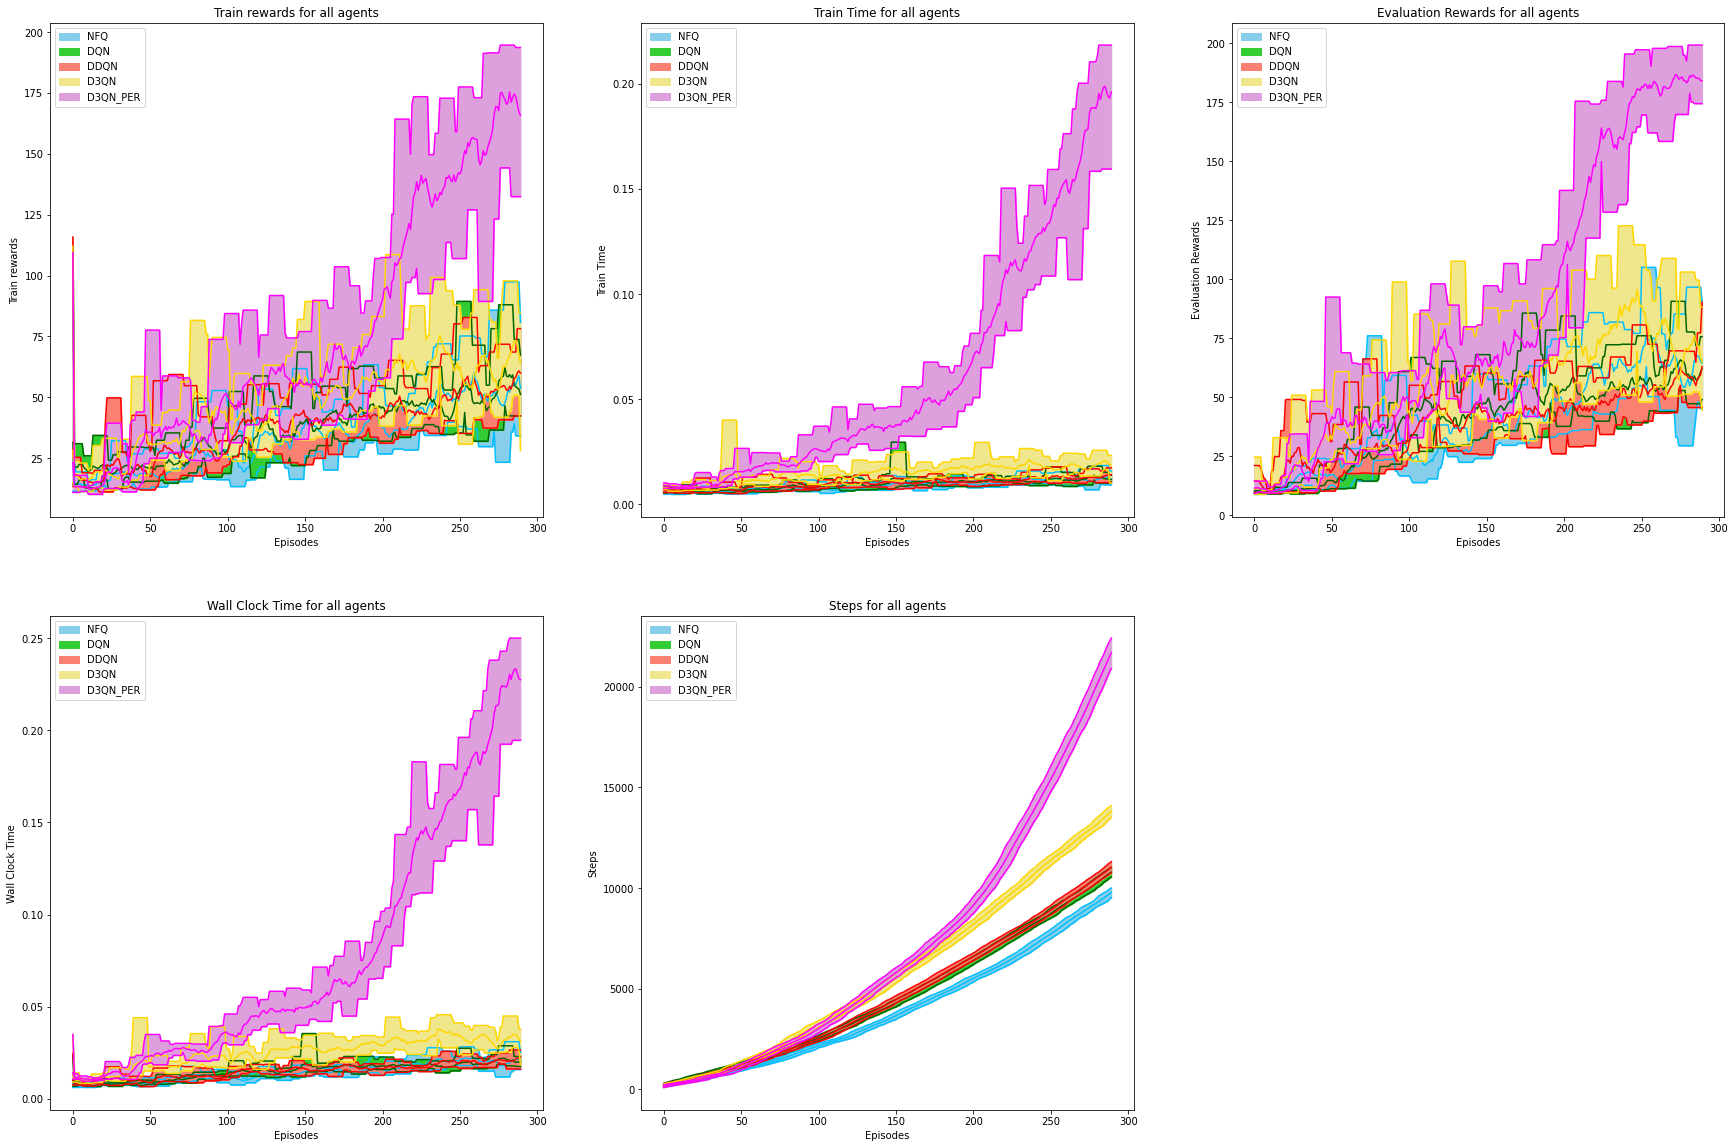

In [ ]:
env = gym.make('CartPole-v0')
runDeepValueBasedAgents(env,episodes=300)

11. Based on plots for CartPole environment, what are your observations about different agents. Compare different agents.  

1) D3QN with prioritized replay is the fastest to learn, reaching a higher number of training rewards in fewer episodes. This is followed by vanilla D3QN. DDQN and DQN seem to have similair performance while NFQ is the slowest to learn.

2) There seems to be a strong correlation between performance and training time as the order followed by the algorithms in training rewards is maintained in the training time. Therefore, there is a tradeoff between performance and training time. The training time seems to be higher in the DQN with PER because of the added priority list.

3) The algorithms are good at generalising and follow the same order as traning rewards during evaluation as well. The D3QN with PER is close to reaching the maximum performance in the environment (200) in 300 episodes while NFQ is the slowest to learn despite adding a replay buffer, because of the moving target issue caused by using a single network.

4) The wall clock time as expected follows a similar trend to the training time. The DQN-PER algorithm takes nearly 6 times more than the second slowest algorithm (D3QN).

5) The steps in the environment indicates how long the agent is able to stay alive in the game and we see an approximation of exponential growth for the D3QN-PER algorithm,supported by the higher training and evaluation rewards received as well. We see a clearer distinction in performance in this plot but the same trend is followed (D3QN>DDQN~DQN>NFQ), highlighting the difference in performance.

### Mountain Car

6. Plot mean train rewards vs episodes for MountatinCar environment.
7. Plot mean evaluation rewards vs episodes.
8. Plot total steps vs episode for MountatinCar environment.
9. Plot train time vs episode for MountatinCar environment.
10. Plot wall clock time vs episode for MountatinCar environment.

Seed for environment 1 is 288.
Seed for environment 2 is 991.
Seed for environment 3 is 85.
Seed for environment 4 is 536.
Seed for environment 5 is 175.
[[[[-2.00000000e+02 -2.00000000e+02 -2.00000000e+02 ... -2.00000000e+02
    -2.00000000e+02 -2.00000000e+02]
   [-2.00000000e+02 -2.00000000e+02 -2.00000000e+02 ... -2.00000000e+02
    -2.00000000e+02 -2.00000000e+02]
   [-2.00000000e+02 -2.00000000e+02 -2.00000000e+02 ... -2.00000000e+02
    -2.00000000e+02 -2.00000000e+02]
   [-2.00000000e+02 -2.00000000e+02 -2.00000000e+02 ... -2.00000000e+02
    -2.00000000e+02 -2.00000000e+02]
   [-2.00000000e+02 -2.00000000e+02 -2.00000000e+02 ... -2.00000000e+02
    -2.00000000e+02 -2.00000000e+02]]

  [[ 3.26281548e-01  3.27064514e-01  3.19791079e-01 ...  4.89741325e-01
     4.93169546e-01             nan]
   [ 3.20040941e-01  3.19213390e-01  3.39876413e-01 ...  4.82209682e-01
     5.24148703e-01             nan]
   [ 3.21493626e-01  3.33350182e-01  5.45086622e-01 ...  4.49815989e-01
     4.76

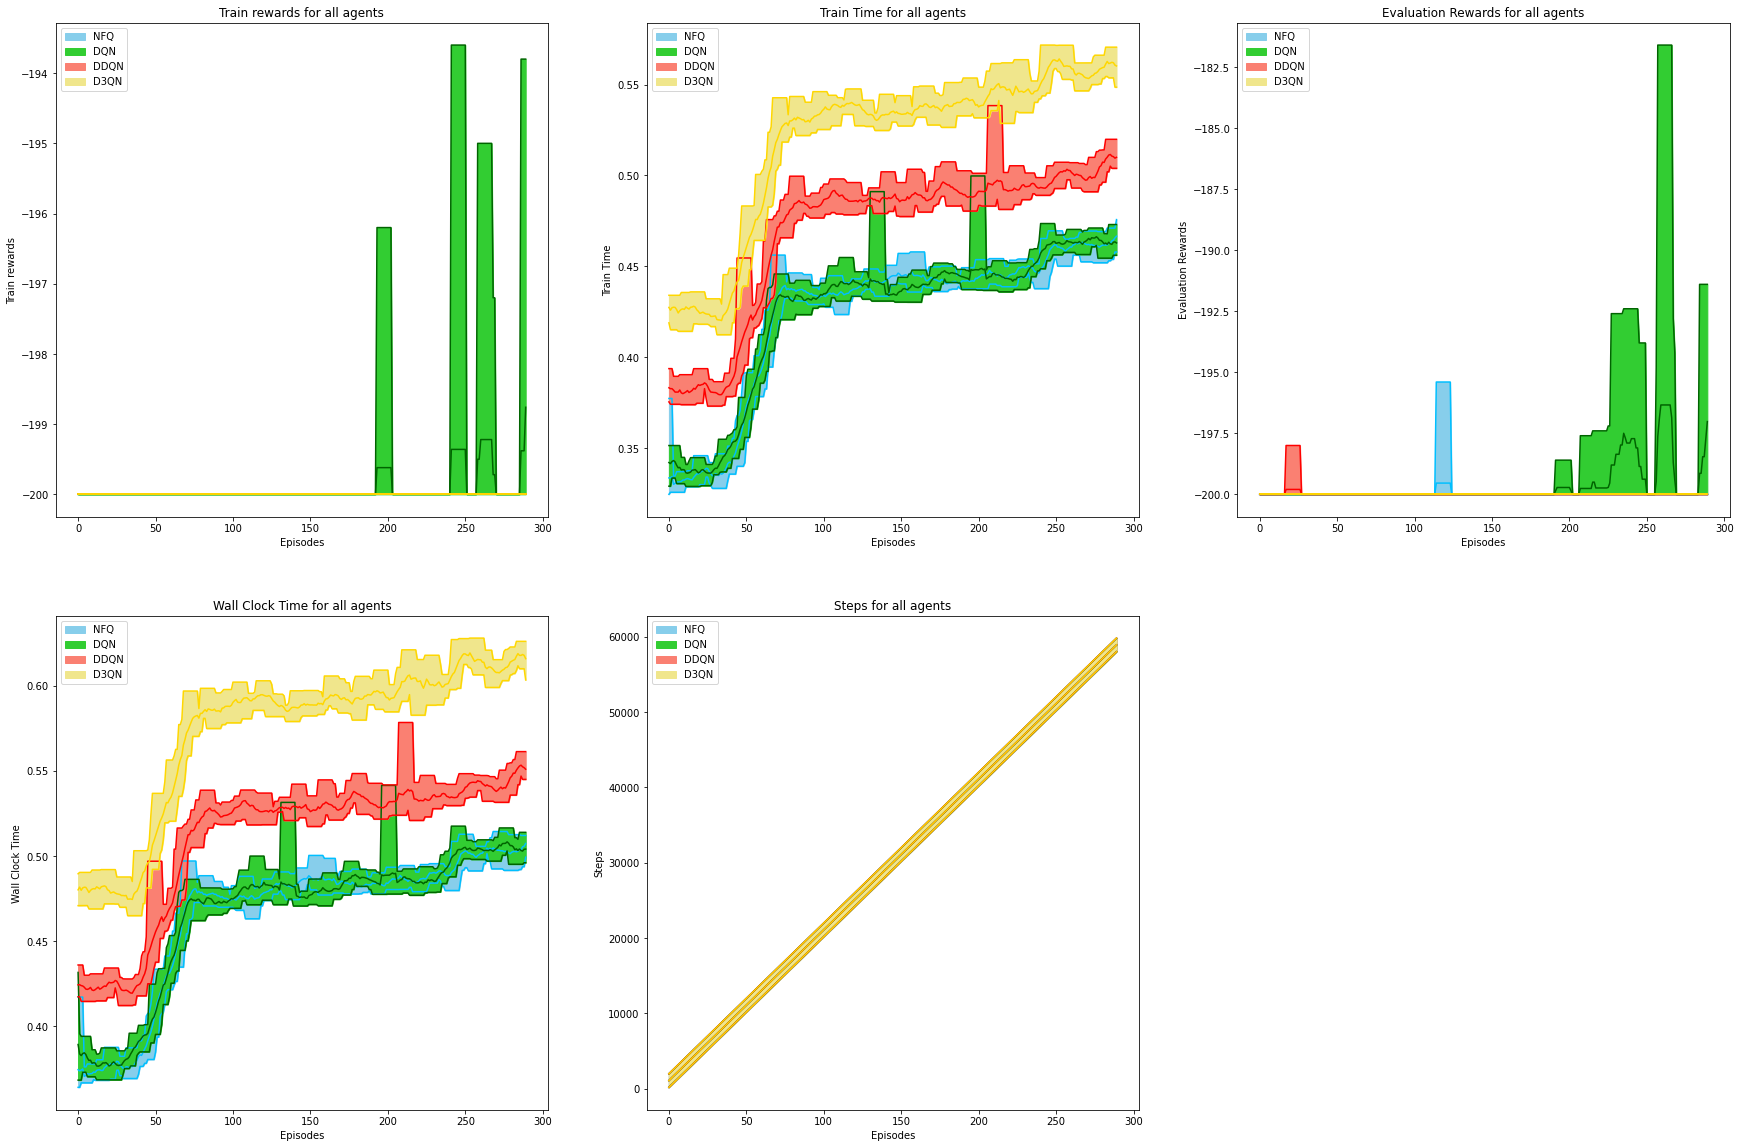

In [ ]:
env = gym.make('MountainCar-v0')
runDeepValueBasedAgents(env,episodes=300,update=5, epochs=100)

12. Based on plots for MountainCar environment, what are your observations about different agents. Compare different agents. Do these observations concur with the ones for CartPole environment? 

All the algorithms struggle with the MountainCar environment generating very minimal rewards over the episodes, despite having greater training. 
(D3QN-PER was omitted due to time constraints)

1) The DQN algorithm is the only agorithm which shows rewards greater than the minimum value towards the end of the episodes. This indicates that the algorithm could perform better with further training. A different pattern was seen in the CartPole environment performance.
2) The train time seems to follow a similair trends as seen in the cartpole environment (D3QN>DDQN>DQN>NFQ) but the relationship between train time and rewards which was seen earlier is not consistent in the current plot.

3) The DQN algorithm again seems to be the only algorithm with rewards greater than the minimum value during evalutaion. The increase in rewards is also negligible but the trend indicates this could improve with further training.

4) Wall clock time also follows the trend seen in train time, as expected. 

5) The linear plot of steps vs episodes and the inability to differentiate between the algorithms performance is indicative of the difficulty of the environment and lack of ability of the algorithms. The number of steps taken is constant for the number of episodes, indicating a lack of learning.

13. Based on both the environments, can you generalize some of the findings for the value-based agents? If yes what are those findings?

The poor performance in the MountainCar environment makes it difficult to generalise findings based on both the environments. However, the plots do show that the higher performance of the algorithms in a particular environment need not translate to different environments and some algorithms may be more adept to certain environments and may struggle in others.